# Capstone Webscrapping using BeautifulSoup

This notebook contains guidances & tasks on the data processing for the application

## background

(Here I want to extract Date and Volume to know how Etherium volume movement. So I need the data from Date column and Volume column )

## Requesting the Data and Creating a BeautifulSoup

Let's begin with requesting the web from the site with `get` method.

In [49]:
import requests

url = 'https://www.coingecko.com/en/coins/ethereum/historical_data/?start_date=2020-01-01&end_date=2021-06-30#panel'
url_get = requests.get(url, 
                      headers = {
        'User-Agent': 'Popular browsers user-agent'
    })

To visualize what exactly you get from the `request.get`, we can use .content so ee what we exactly get, in here i slice it so it won't make our screen full of the html we get from the page. You can delete the slicing if you want to see what we fully get.

In [50]:
url_get.content[1:500]

b'!DOCTYPE html>\n<html lang="en">\n<head>\n<script src="/cdn-cgi/apps/head/gYtXOyllgyP3-Z2iKTP8rRWGBm4.js"></script><script async defer src="https://www.googleoptimize.com/optimize.js?id=GTM-W3CD992"></script>\n<meta charset="utf-8">\n<meta http-equiv="X-UA-Compatible" content="IE=edge">\n<script>window.NREUM||(NREUM={});NREUM.info={"beacon":"bam.nr-data.net","errorBeacon":"bam.nr-data.net","licenseKey":"cd4a6493ab","applicationID":"83495717","transactionName":"dV5dRBNcDlkEEU5SDF9fQB8JWhFBDhEIUgJabldR'

As we can see we get a very unstructured and complex html, which actually contains the codes needed to show the webpages on your web browser. But we as human still confused what and where we can use that piece of code, so here where we use the beautifulsoup. Beautiful soup class will result a beautifulsoup object. Beautiful Soup transforms a complex HTML document into a complex tree of Python objects. 

Let's make Beautiful soup object and feel free to explore the object here.

In [51]:
from bs4 import BeautifulSoup 

soup = BeautifulSoup(url_get.content,"html.parser")
print(type(soup))

<class 'bs4.BeautifulSoup'>


In [52]:
print(soup.prettify()[:500])

<!DOCTYPE html>
<html lang="en">
 <head>
  <script src="/cdn-cgi/apps/head/gYtXOyllgyP3-Z2iKTP8rRWGBm4.js">
  </script>
  <script async="" defer="" src="https://www.googleoptimize.com/optimize.js?id=GTM-W3CD992">
  </script>
  <meta charset="utf-8"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <script>
   window.NREUM||(NREUM={});NREUM.info={"beacon":"bam.nr-data.net","errorBeacon":"bam.nr-data.net","licenseKey":"cd4a6493ab","applicationID":"83495717","transactionName":"dV5dRBNcDl


## Finding the right key to scrap the data & Extracting the right information

Find the key and put the key into the `.find()` Put all the exploring the right key at this cell. (Here I will find_all th tag so I can see how the Date content in the table.

Finding row length.

Do the scrapping process here (please change this markdown with your explanation)

In [53]:
rightkey = soup.find_all('th',class_ = 'font-semibold text-center')
row = len(rightkey)
print(row)

60


Content from table located in tr tags. The contents of the Date column itself is wrapped with a th tag, whereas the contents of the Volume column wrapped with td tag. But, there are some columns that wrapped with a td tag ('Market Cap, Volume, Open, Close). Because we just scrap the contents of the Volume column so we just scrap the second td tag because the content of Volume column is wrapped by second td. It means we must scrap td[1] (because index start from 0). So let's looping to exctract all text in every column.

In [54]:
temp = []
for tr in soup.find_all('tr')[1:]:
    ths = tr.find_all('th')
    date= ths[0].text
    tds = tr.find_all('td')
    volume= tds[1].text.strip()
    
    temp.append((date, volume))

temp
    

[('2021-06-30', '$27,149,143,847'),
 ('2021-06-29', '$30,629,329,806'),
 ('2021-06-28', '$24,316,408,028'),
 ('2021-06-27', '$24,249,510,321'),
 ('2021-06-26', '$25,981,381,067'),
 ('2021-06-25', '$22,447,489,242'),
 ('2021-06-24', '$28,098,744,045'),
 ('2021-06-23', '$38,755,019,937'),
 ('2021-06-22', '$39,499,960,408'),
 ('2021-06-21', '$26,235,850,447'),
 ('2021-06-20', '$20,456,963,375'),
 ('2021-06-19', '$26,204,484,921'),
 ('2021-06-18', '$25,708,624,827'),
 ('2021-06-17', '$26,150,320,395'),
 ('2021-06-16', '$26,803,957,680'),
 ('2021-06-15', '$28,128,172,338'),
 ('2021-06-14', '$29,382,118,964'),
 ('2021-06-13', '$28,235,882,062'),
 ('2021-06-12', '$26,751,786,966'),
 ('2021-06-11', '$33,075,957,437'),
 ('2021-06-10', '$43,973,432,438'),
 ('2021-06-09', '$48,344,195,674'),
 ('2021-06-08', '$37,385,872,210'),
 ('2021-06-07', '$29,050,162,249'),
 ('2021-06-06', '$34,731,979,705'),
 ('2021-06-05', '$39,996,583,175'),
 ('2021-06-04', '$38,104,663,185'),
 ('2021-06-03', '$39,148,856

## Creating data frame & Data wrangling

Put the array into dataframe

In [55]:
import pandas as pd
df = pd.DataFrame(temp, columns =('Date', 'Volume'))
df.head()

,Date,Volume
0,2021-06-30,"$27,149,143,847"
1,2021-06-29,"$30,629,329,806"
2,2021-06-28,"$24,316,408,028"
3,2021-06-27,"$24,249,510,321"
4,2021-06-26,"$25,981,381,067"


So I must change data types of every columns. The "Date" column must change to datetime64. Whereas The "Volume" column must change to int64. But before I must delete some string in the 'Volume' column so that it can changed to int64

In [56]:
df.dtypes

Date      object
Volume    object
dtype: object

Data visualisation (please change this markdown with your explanation of what you do for data wrangling)

In [57]:
df['Volume'] = df['Volume'].str.replace(',' , '')
df['Volume'] = df['Volume'].str.replace('$', '')
df['Volume'] = df['Volume'].astype('int64')
df['Date'] =   df['Date'].astype('datetime64')
df.dtypes

Date      datetime64[ns]
Volume             int64
dtype: object

In [58]:
df

,Date,Volume
0,2021-06-30,27149143847
1,2021-06-29,30629329806
2,2021-06-28,24316408028
3,2021-06-27,24249510321
4,2021-06-26,25981381067
5,2021-06-25,22447489242
6,2021-06-24,28098744045
7,2021-06-23,38755019937
8,2021-06-22,39499960408
9,2021-06-21,26235850447


In [59]:
df = df.set_index('Date')

### Implementing your webscrapping to the flask dashboard

- Copy paste all of your web scrapping process to the desired position on the `app.py`
- Changing the title of the dasboard at `index.html`

## Finishing This Notebook with Your Analysis and Conclusion

First you can do start with making the data visualisation. 

Data visualisation (Here I just change the "Date column as index and I can show the plot)

<AxesSubplot:xlabel='Date'>

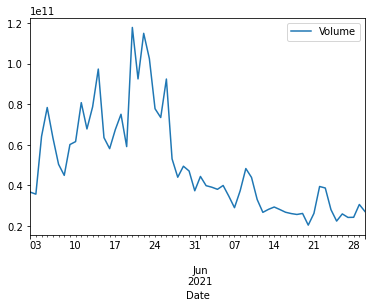

In [60]:
df.plot()

So I can draw the following conclusions:
- The highest volume movement occurred on May 20, 2021
- The lowest volume movement occured on June 20, 2021

### Extra Challange

This will be not included to the scoring. 

- You can create additional analysis from the data.
- Implement it to the dashboard with at `app.py` dan `index.html`.